In [1]:
from scm.csm import StructuralCausalModel, \
    linear_model, logistic_model

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from typing import Optional
import pandas as pd

In [2]:
def gaussian_mixture(n_samples: int, means: list, stds: list, weights: Optional[list] = None) -> np.ndarray:
    """
    Generate a Gaussian mixture distribution with the given means, standard deviations and weights.
    """
    if weights is None:
        weights = [1/len(means)] * len(means)
    assert len(means) == len(stds) == len(weights)
    n_components = len(means)
    components = [np.random.normal(loc=means[i], scale=stds[i], size=int(n_samples * weights[i])) for i in range(n_components)]
    return np.concatenate(components)

<Axes: ylabel='Density'>

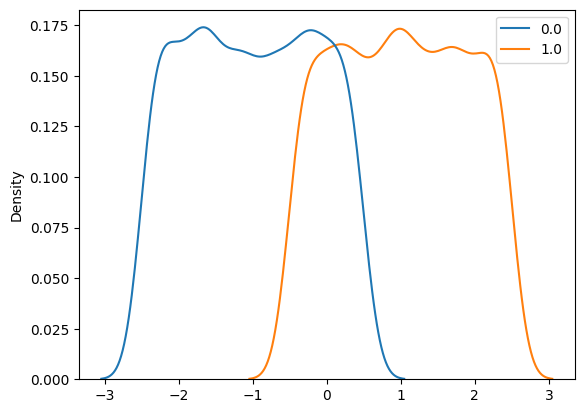

In [10]:
n_samples = 5000

site = np.random.choice([0, 1, 2], p=[0.33, 0.33, 0.34], size=n_samples)
binary_var = np.random.binomial(n=1, p=0.5, size=n_samples)

# create age_bin such that for all combinations of site and binary_var, the age_bin is different: p(age_bin | site, binary_var) = ... for each combination
age_binary = np.zeros(n_samples)
age_binary[(site == 0) & (binary_var == 0)] = np.random.binomial(n=1, p=0.85, size=np.sum((site == 0) & (binary_var == 0)))
age_binary[(site == 0) & (binary_var == 1)] = np.random.binomial(n=1, p=0.85, size=np.sum((site == 0) & (binary_var == 1)))
age_binary[(site == 1) & (binary_var == 0)] = np.random.binomial(n=1, p=0.85, size=np.sum((site == 1) & (binary_var == 0)))
age_binary[(site == 1) & (binary_var == 1)] = np.random.binomial(n=1, p=0.15, size=np.sum((site == 1) & (binary_var == 1)))
age_binary[(site == 2) & (binary_var == 0)] = np.random.binomial(n=1, p=0.15, size=np.sum((site == 2) & (binary_var == 0)))
age_binary[(site == 2) & (binary_var == 1)] = np.random.binomial(n=1, p=0.15, size=np.sum((site == 2) & (binary_var == 1)))

age = np.zeros(n_samples)
age[age_binary == 0] = np.random.uniform(-2.5, 0.5, size=np.sum(age_binary == 0))
age[age_binary == 1] = np.random.uniform(-0.5, 2.5, size=np.sum(age_binary == 1))

sns.kdeplot(x=age, hue=age_binary)

In [11]:
# predict binary_age from the others
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = pd.DataFrame({'age': age, 'site': site, 'binary_var': binary_var})
y = age_binary
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

logit = sm.Logit(y_train, X_train)
result = logit.fit()

y_pred = result.predict(X_test)
y_pred = np.round(y_pred)
print("accuracy all", accuracy_score(y_test, y_pred))

X = pd.DataFrame({'age': age, 'site': site})
y = age_binary

X = sm.add_constant(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

logit = sm.Logit(y_train, X_train)
result = logit.fit()

y_pred = result.predict(X_test)
y_pred = np.round(y_pred)
print("accuracy age and site", accuracy_score(y_test, y_pred))

X = pd.DataFrame({'age': age, 'binary_var': binary_var})
y = age_binary

X = sm.add_constant(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

logit = sm.Logit(y_train, X_train)
result = logit.fit()

y_pred = result.predict(X_test)
y_pred = np.round(y_pred)
print("accuracy age and binary_var", accuracy_score(y_test, y_pred))

X = pd.DataFrame({'age': age})
y = age_binary

X = sm.add_constant(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

logit = sm.Logit(y_train, X_train)
result = logit.fit()

y_pred = result.predict(X_test)
y_pred = np.round(y_pred)
print("accuracy age", accuracy_score(y_test, y_pred))

X = pd.DataFrame({'binary_var': binary_var})
y = age_binary
# add a constant
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

logit = sm.Logit(y_train, X_train)
result = logit.fit()

y_pred = result.predict(X_test)
y_pred = np.round(y_pred)
print("accuracy binary_var", accuracy_score(y_test, y_pred))

X = pd.DataFrame({'site': site})
y = age_binary

X = sm.add_constant(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

logit = sm.Logit(y_train, X_train)
result = logit.fit()

y_pred = result.predict(X_test)
y_pred = np.round(y_pred)
print("accuracy site", accuracy_score(y_test, y_pred))

Optimization terminated successfully.
         Current function value: 0.186176
         Iterations 9
accuracy all 0.922
Optimization terminated successfully.
         Current function value: 0.201707
         Iterations 9
accuracy age and site 0.916
Optimization terminated successfully.
         Current function value: 0.276058
         Iterations 8
accuracy age and binary_var 0.84
Optimization terminated successfully.
         Current function value: 0.279617
         Iterations 8
accuracy age 0.821
Optimization terminated successfully.
         Current function value: 0.667106
         Iterations 4
accuracy binary_var 0.627
Optimization terminated successfully.
         Current function value: 0.494573
         Iterations 6
accuracy site 0.722


In [12]:
samples = {"Age": age, "Sex": binary_var, "Site": site, "Age_binary": age_binary, "Age_true": age, "Sex_true": binary_var, "Site_true": site}
samples = pd.DataFrame(samples)

In [13]:
# re-arange the columns to Age, Sex, Site and leave out the rest
# also add eid column, and assign a unique id running from 1 to n_samples
samples["eid"] = np.arange(1, len(samples) + 1)
samples = samples[["eid","Age", "Sex", "Site", "Age_binary", "Age_true", "Sex_true", "Site_true"]]

# de-standardize the Age column (age - 63.709) / 7.519
samples["Age"] = samples["Age"] * 7.519 + 63.709
samples["Age"] = samples["Age"].round().astype(int)
samples["Age_true"] = samples["Age"]

# map site back, such that it reverses SITE_MAP = {11025: 0., 11026: 1., 11027: 2.}
SITE_MAP = {0: 11025, 1: 11026, 2: 11027}
samples["Site"] = samples["Site"].map(SITE_MAP)
samples["Site_true"] = samples["Site_true"].map(SITE_MAP)

samples["Age_binary"] = samples["Age_binary"].astype(int)
samples["Sex"] = samples["Sex"].astype(int)
samples["Sex_true"] = samples["Sex_true"].astype(int)

In [14]:
# shuffle the data
samples = samples.sample(frac=1).reset_index(drop=True)


In [15]:
samples.shape

(5000, 8)

In [16]:
samples.head()

,eid,Age,Sex,Site,Age_binary,Age_true,Sex_true,Site_true
0,3410,66,1,11025,1,66,1,11025
1,81,62,1,11027,0,62,1,11027
2,4094,47,0,11025,0,47,0,11025
3,409,61,1,11027,0,61,1,11027
4,2717,61,1,11025,1,61,1,11025


<Axes: xlabel='Site', ylabel='count'>

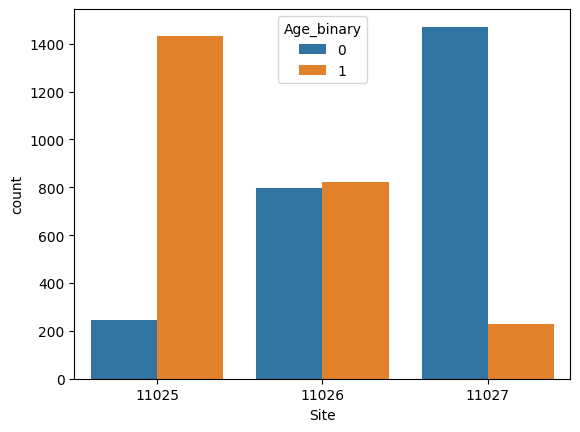

In [17]:
sns.countplot(x="Site", hue="Age_binary", data=samples)

<Axes: xlabel='Sex', ylabel='count'>

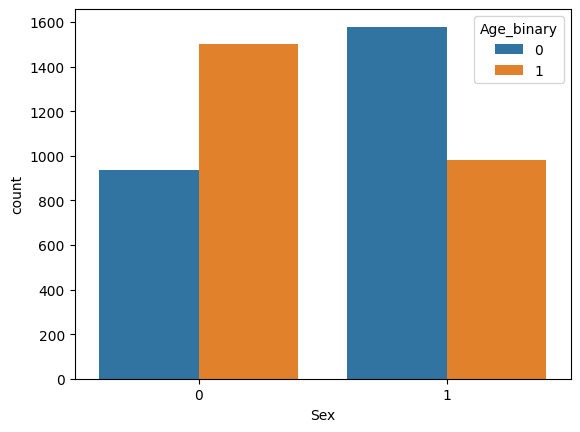

In [18]:
sns.countplot(data=samples, x="Sex", hue="Age_binary")

In [19]:
samples.head()

,eid,Age,Sex,Site,Age_binary,Age_true,Sex_true,Site_true
0,3410,66,1,11025,1,66,1,11025
1,81,62,1,11027,0,62,1,11027
2,4094,47,0,11025,0,47,0,11025
3,409,61,1,11027,0,61,1,11027
4,2717,61,1,11025,1,61,1,11025


In [20]:
# standardize age and store it
samples["Age_std"] = (samples["Age"] - 63.709) / 7.519

<Axes: xlabel='Site', ylabel='Age_std'>

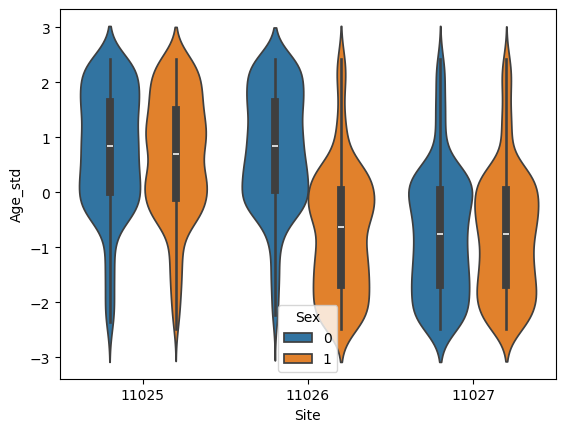

In [21]:
# for all age_bin-site subgroups, get kde of age
sns.violinplot(data=samples, x="Site", y="Age_std", hue="Sex")


In [22]:
samples["Sex_Site"] = samples["Sex"].astype(str) + "_" + samples["Site"].astype(str)

<Axes: xlabel='Age_std', ylabel='Density'>

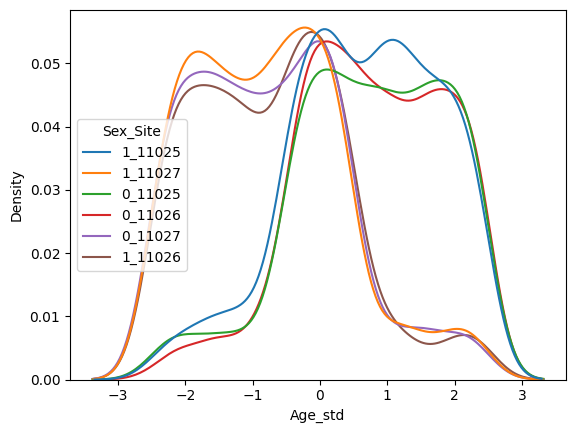

In [23]:
sns.kdeplot(data=samples, x="Age_std", hue="Sex_Site")

<Axes: xlabel='Age_std', ylabel='Density'>

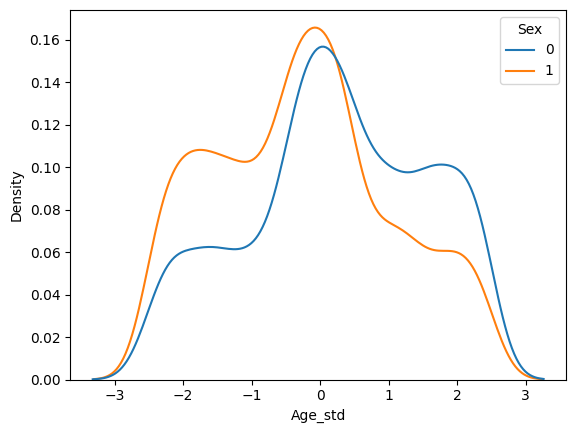

In [24]:
sns.kdeplot(data=samples, x="Age_std", hue="Sex")

In [ ]:
samples.to_csv("mitigation_experiment.csv", index=False)